# Cibernética e Aprendizado de Máquina

## Projeto 1 - Árvore de Decisão

O objetivo do projeto é predizer quais variáveis mais influenciam no momento de determinar a qualidade de vinhos vermelhos e brancos. Serão analisados _data sets_ de vinhos brancos e vermelhos, onde
será aplicado o método de aprendizagem supervisionada chamado árvore de decisão. Os _data sets_ analisados podem ser encontrados no repositório de aprendizado de máquina disponível em 
<https://archive.ics.uci.edu/ml/datasets/wine+quality>. 

O algoritmo a seguir deve:

1. Selecionar o melhor atributo para dividir/separar os registros e ser a raiz da árvore;
2. Utilizar e comparar resultados com 3 medidas de informação: **Ganho de informação; Índice Gini; Razão de Ganho**;
3. Realizar testes com **70% dos dados aleatórios para treinamento, 30% para validação (teste)**;
4. Mostrar métricas de **Acurácia, Precisão, Revocação**.

In [21]:
# Carregando as bibliotecas necessárias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importar Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importar função train_test_split 
from sklearn import metrics # Importar scikit-learn metrics module para cálculo de acurácia
from sklearn import tree # Plotar a árvore de decisão
from matplotlib import pyplot as plt
import graphviz

In [22]:
# Realizando a leitura dos dados de vinho vermelho
data_red = pd.read_csv("winequality-red.csv", header = 0, sep = ';')
data_red.head()

#col_names = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',
#            'density','pH','sulphates','alcohol','quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
# Realizando a leitura dos dados de vinho branco
data_white = pd.read_csv("winequality-white.csv", header = 0, sep = ';')
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [24]:
# Separando os dados
feature_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',
                'density','pH','sulphates','alcohol']


X_red = data_red[feature_cols]
#print(X_red)
Y_red = data_red.quality
print(Y_red)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [25]:
X_white = data_white[feature_cols]
#print(X)
Y_white = data_white.quality
print(Y_white)

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64


In [26]:
# Dividindo o dataset em conjuntos para treinamento e teste
#70% para treinamento e 30% para teste
X_train_red, X_test_red, Y_train_red, Y_test_red = train_test_split(X_red, Y_red, test_size = 0.3, random_state = 1) 
X_train_white, X_test_white, Y_train_white, Y_test_white = train_test_split(X_white, Y_white, test_size = 0.3, random_state = 1)

In [27]:
# Criando o objeto Decision Tree
clf_red = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_features = "log2", max_depth = 3)
clf_white = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_features = "auto", max_depth=3)

# Treinando o Decision Tree Classifier
clf_red = clf_red.fit(X_train_red,Y_train_red)
clf_white = clf_white.fit(X_train_white,Y_train_white)

# Predizendo a respota para o dataset
y_pred_red = clf_red.predict(X_test_red)
y_pred_white = clf_white.predict(X_test_white)

In [28]:
indices_red = clf_red.feature_importances_
print(indices_red)

[0.         0.         0.         0.05330808 0.         0.
 0.36139922 0.1276149  0.         0.         0.4576778 ]


In [29]:
indices_white = clf_white.feature_importances_
print(indices_white)

[0.         0.         0.05733166 0.03988832 0.         0.
 0.27946847 0.62331155 0.         0.         0.        ]


In [30]:
# Acurácia do modelo
print("Cirtério de Gini")
print("Acurácia (vinho vermelho):",metrics.accuracy_score(Y_test_red, y_pred_red))
print("Acurácia (vinho branco):",metrics.accuracy_score(Y_test_white, y_pred_white))

Cirtério de Gini
Acurácia (vinho vermelho): 0.59375
Acurácia (vinho branco): 0.46598639455782315


Número de folhas: 8
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
[0.         0.         0.         0.05330808 0.         0.
 0.36139922 0.1276149  0.         0.         0.4576778 ]


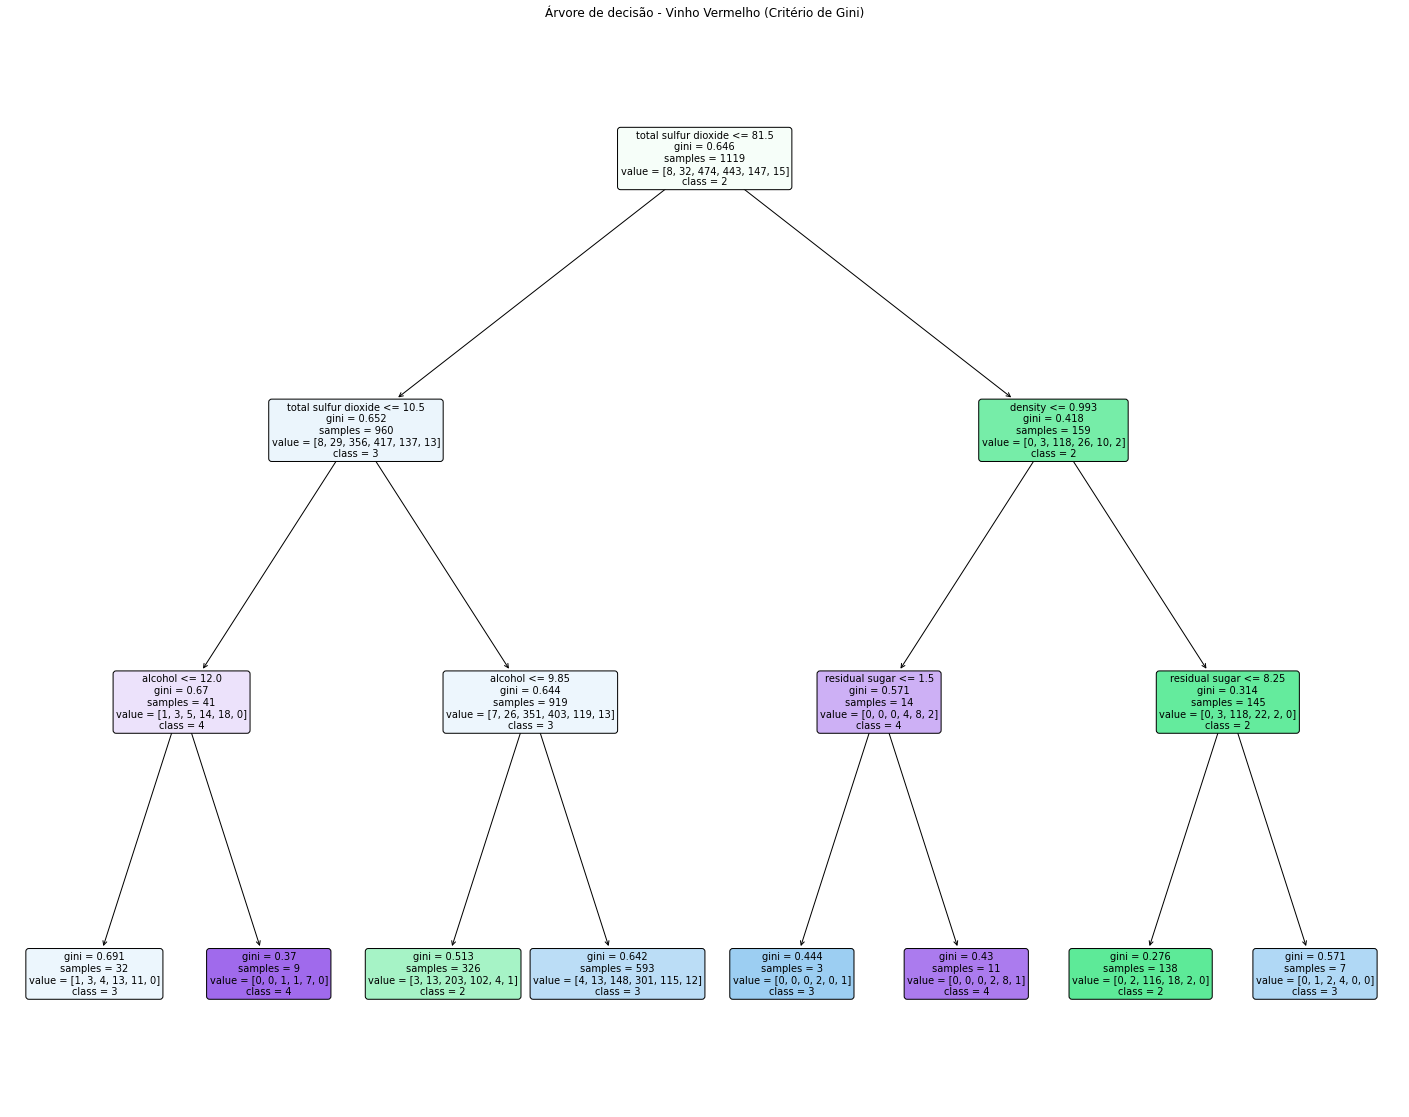

In [37]:
fig = plt.figure(figsize=(25,20))
print("Número de folhas:", clf_red.get_n_leaves())
print(feature_cols)
print(clf_red.feature_importances_)
#tree.plot_tree(clf_red, max_depth = 3, filled = True, rounded=True)
feature_class = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
tree.plot_tree(clf_red, filled = True, rounded=True, class_names = feature_class, feature_names = feature_cols)
plt.title("Árvore de decisão - Vinho Vermelho (Critério de Gini)")
plt.show()

Número de folhas: 8
[0.         0.         0.07665498 0.         0.32694927 0.07584485
 0.         0.         0.         0.         0.5205509 ]


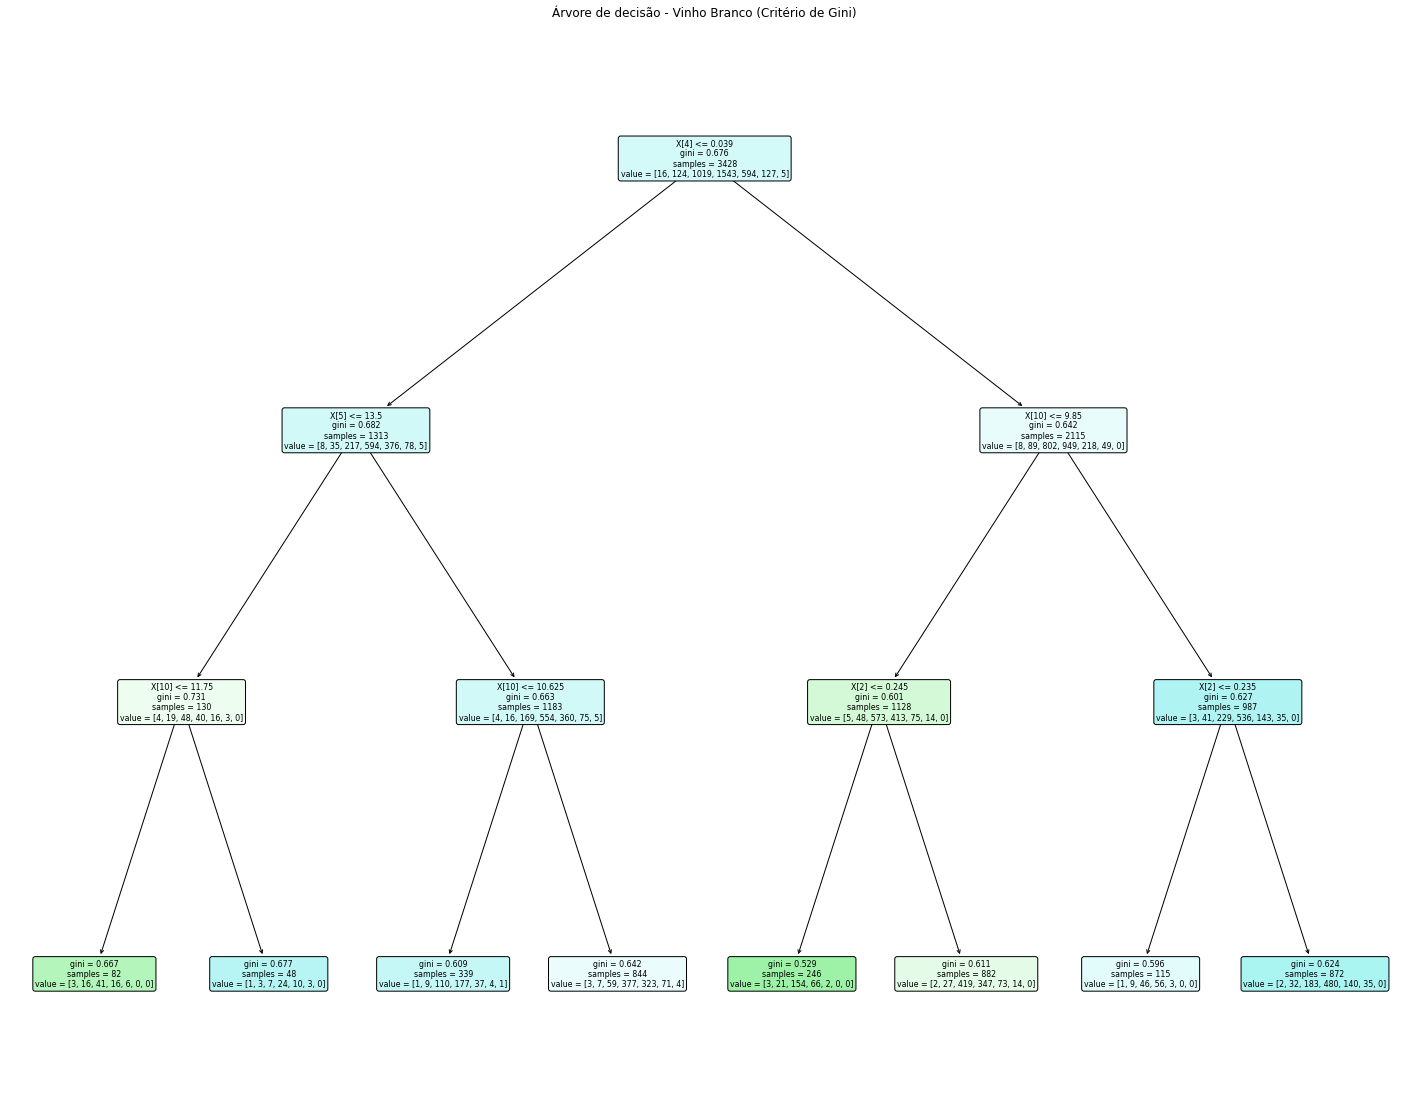

In [158]:
fig = plt.figure(figsize=(25,20))
print("Número de folhas:", clf_white.get_n_leaves())
print(clf_white.feature_importances_)
#tree.plot_tree(clf_white, max_depth = 2, filled = True, rounded=True)
tree.plot_tree(clf_white, filled = True, rounded=True)
plt.title("Árvore de decisão - Vinho Branco (Critério de Gini)")
plt.show()

In [159]:
# Criando o objeto Decision Tree
clf_red = DecisionTreeClassifier(criterion = "entropy", max_features = "log2", max_depth = 3)
clf_white = DecisionTreeClassifier(criterion = "entropy", max_features = "sqrt", max_depth = 3)

# Treinando o Decision Tree Classifier
clf_red = clf_red.fit(X_train_red,Y_train_red)
clf_white = clf_white.fit(X_train_white,Y_train_white)

# Predizendo a respota para o dataset
y_pred_red = clf_red.predict(X_test_red)
y_pred_white = clf_white.predict(X_test_white)

In [160]:
# Acurácia do modelo
print("Cirtério da Entropia")
print("Acurácia (vinho vermelho):",metrics.accuracy_score(Y_test_red, y_pred_red))
print("Acurácia (vinho branco):",metrics.accuracy_score(Y_test_white, y_pred_white))

Cirtério da Entropia
Acurácia (vinho vermelho): 0.5708333333333333
Acurácia (vinho branco): 0.45034013605442175


Número de folhas: 8
[0.         0.42898998 0.03345634 0.03144994 0.         0.
 0.         0.09103298 0.         0.09131434 0.32375642]


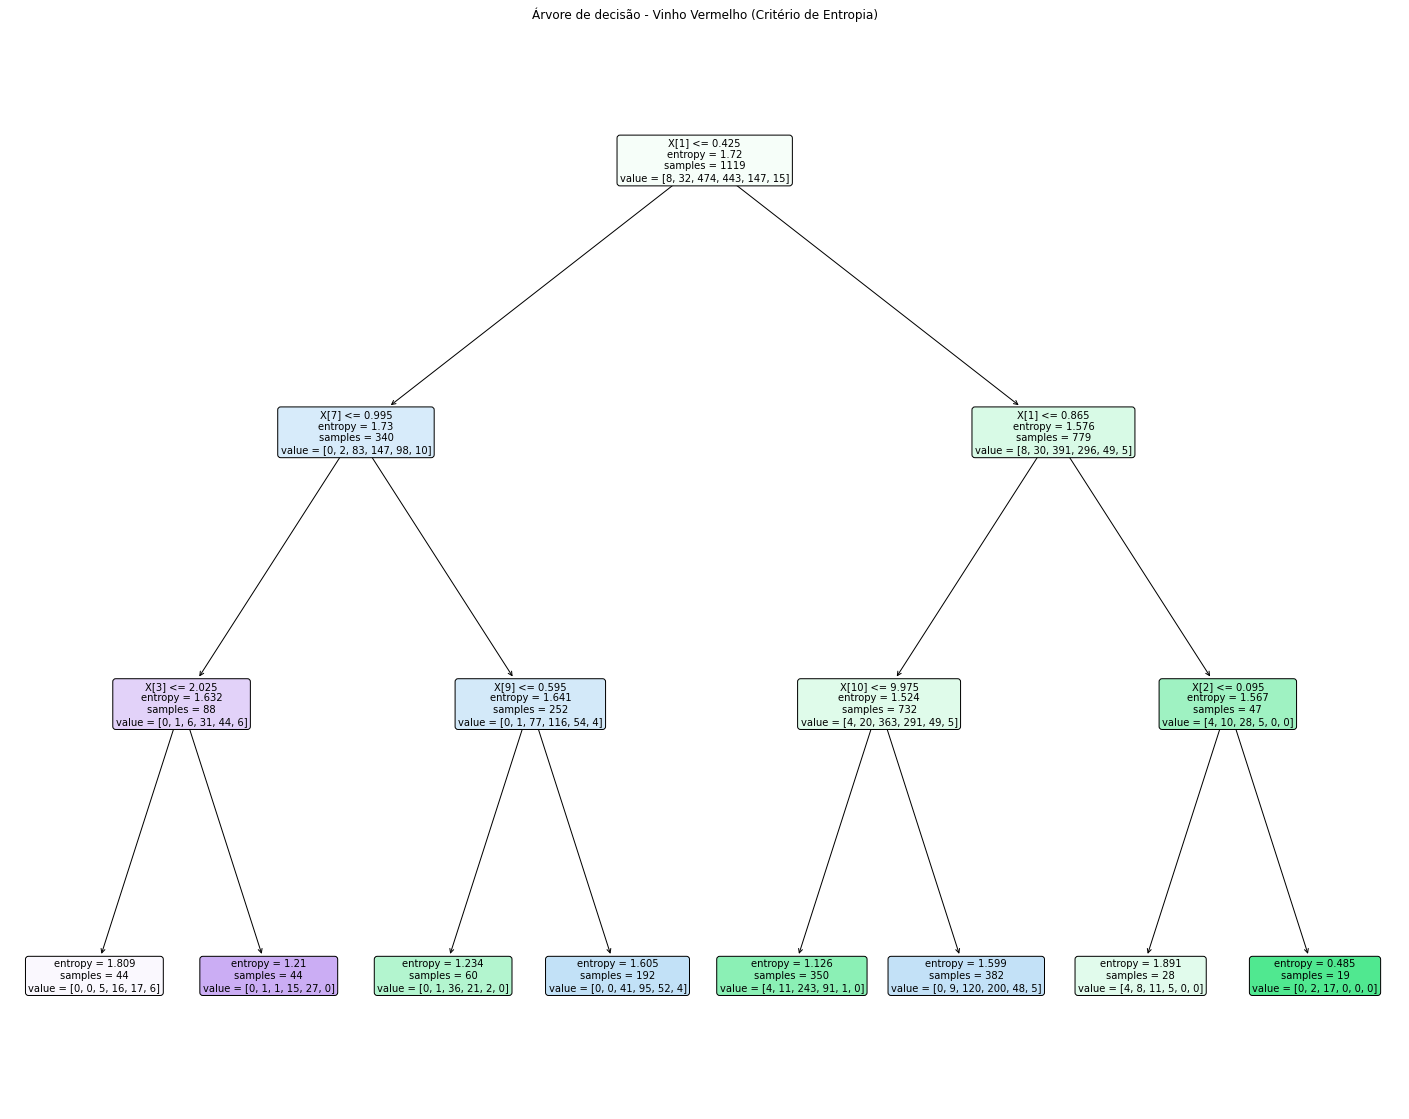

In [161]:
fig = plt.figure(figsize=(25,20))
print("Número de folhas:", clf_red.get_n_leaves())
print(clf_red.feature_importances_)
tree.plot_tree(clf_red, filled = True, rounded=True)
clf_red.get_n_leaves()
plt.title("Árvore de decisão - Vinho Vermelho (Critério de Entropia)")
plt.show()

Número de folhas: 8
[0.09916325 0.05427169 0.         0.         0.43372321 0.09562876
 0.         0.0322812  0.         0.         0.28493189]


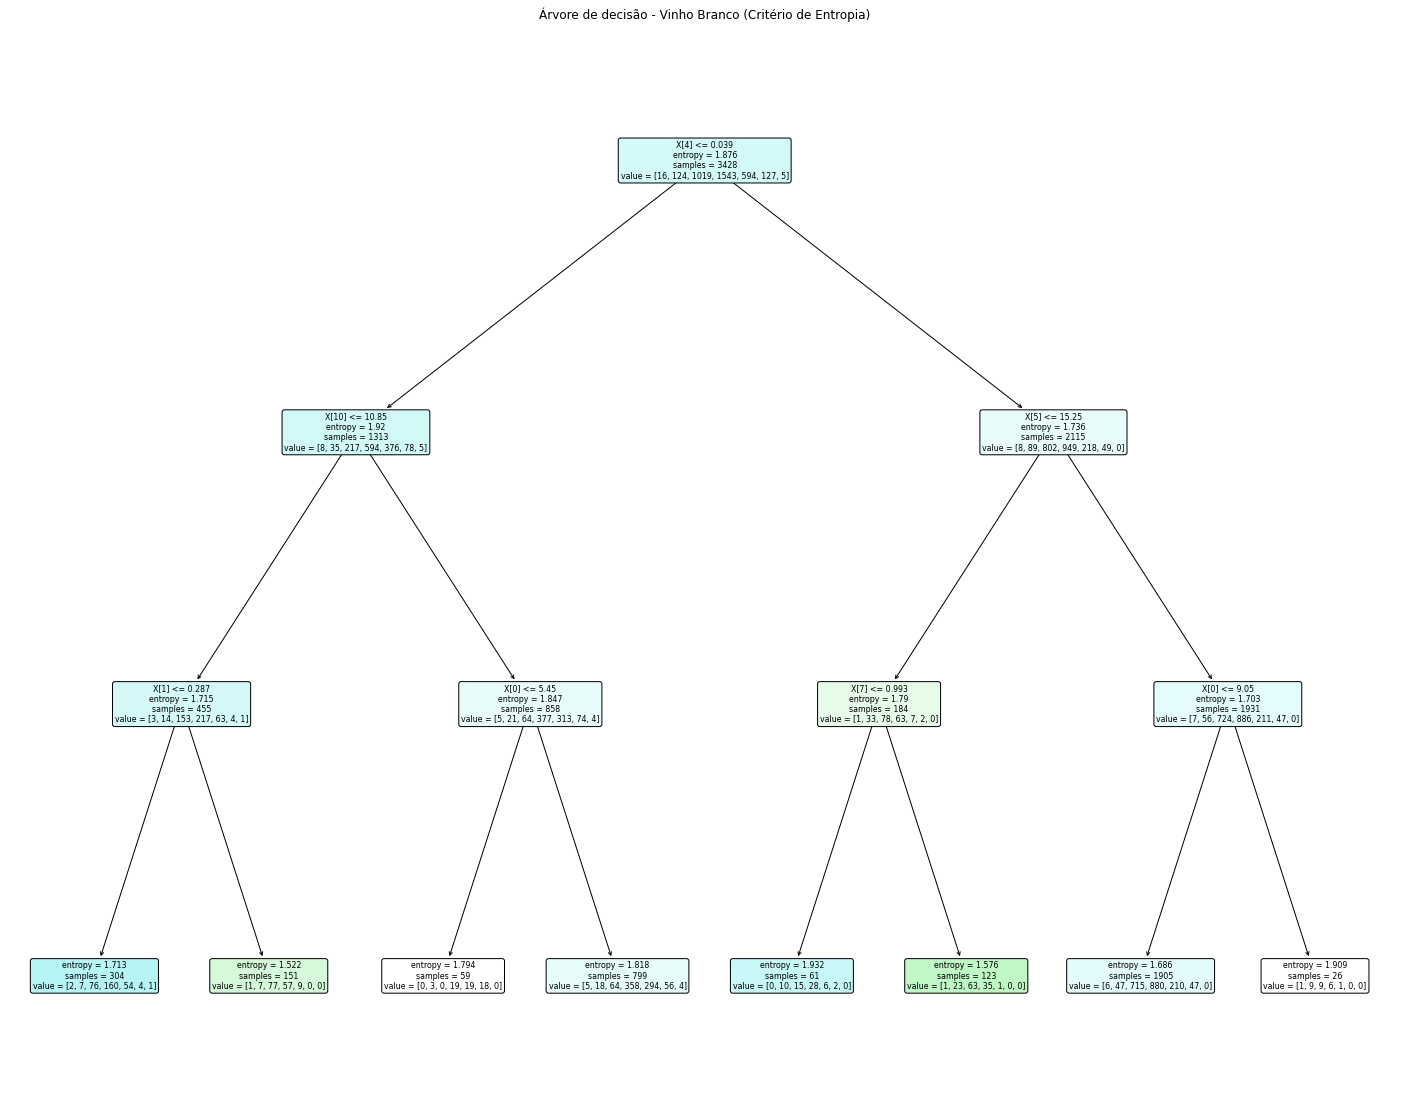

In [162]:
fig = plt.figure(figsize=(25,20))
print("Número de folhas:", clf_white.get_n_leaves())
print(clf_white.feature_importances_)
tree.plot_tree(clf_white, filled = True, rounded=True)
clf_white.get_n_leaves()
plt.title("Árvore de decisão - Vinho Branco (Critério de Entropia)")
plt.show()

In [20]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf_white, X_white, Y_white)

viz

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH